## CNN BASELINE MODEL

In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [2]:
## import json

import numpy as np
import pandas as pd
import keras
import time
from keras.optimizers import SGD
from keras.callbacks import Callback
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### 1.Loading 224x224 dataset

In [ ]:
from time import time
import numpy as np

start_time = time()

X_validate = np.load('/home/zxt/data/21_category/224/2k/X_validate.npy')


X_test = np.load('/home/zxt/data/21_category/224/2k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/21_category/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/21_category/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/21_category/224/2k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

In [7]:
X_train = np.load('/home/zxt/data/21_category/32/5k/X_train.npy')
X_validate = np.load('/home/zxt/data/21_category/32/5k/X_validate.npy')
X_test = np.load('/home/zxt/data/21_category/32/5k/X_test.npy')
Y_train = np.load('/home/zxt/data/21_category/32/5k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/21_category/32/5k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/21_category/32/5k/Y_test.npy')

In [8]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (84000, 32, 32, 3)
84000 train samples
10500 validate samples
10500 test samples


In [9]:
# Convert the images to float and scale it to a range of 0 to 1
# x_train = X_train.astype('float32')
# x_validate = X_validate.astype('float32')
# x_test = X_test.astype('float32')

X_train /=255.
X_validate /=  255.
X_test /= 255.

In [15]:

# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20

In [18]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,21)
y_valid=np_utils.to_categorical(Y_validate,21)
y_test=np_utils.to_categorical(Y_test,21)


In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 2. Create Callback for F1 score

In [24]:
class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" - val_precision: {_val_precision:.4f}"
               f" - val_recall: {_val_recall:.4f}"))

        return

### 3. Creating and Training the Model¶

In [39]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 30
num_classes = 21
input_shape = 32,32,3

learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [46]:
model = None

In [47]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(21))
model.add(Activation('softmax'))

In [48]:
# # Method 1 :failed
# os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

# from keras.utils import multi_gpu_model
# parallel_model = multi_gpu_model(model,gpus=4,cpu_merge=True)


In [49]:
# # medhots 2
# from keras.applications import Xception
# import tensorflow as tf
# with tf.device('/cpu:0'):
#     model = Xception(weights=None,
#                      input_shape=(32,32, 3),
#                      classes=num_classes)
    

# os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

# from keras.utils import multi_gpu_model
# parallel_model = multi_gpu_model(model,gpus=4)



In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

In [51]:

f1_metrics = Metrics()
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[f1_metrics],
    validation_data=(X_validate, y_valid)
)

Train on 84000 samples, validate on 10500 samples
Epoch 1/30
84000/84000 [==============================] - 16s 194us/step - loss: 2.3889 - accuracy: 0.2260 - val_loss: 1.8542 - val_accuracy: 0.3772
val_f1: 0.3298 - val_precision: 0.3572 - val_recall: 0.3744
Epoch 2/30
84000/84000 [==============================] - 16s 188us/step - loss: 1.7631 - accuracy: 0.3882 - val_loss: 1.5197 - val_accuracy: 0.4782
val_f1: 0.4416 - val_precision: 0.4808 - val_recall: 0.4762
Epoch 3/30
84000/84000 [==============================] - 16s 187us/step - loss: 1.5543 - accuracy: 0.4551 - val_loss: 1.3741 - val_accuracy: 0.5290
val_f1: 0.5015 - val_precision: 0.5184 - val_recall: 0.5260
Epoch 4/30
84000/84000 [==============================] - 16s 187us/step - loss: 1.4468 - accuracy: 0.4888 - val_loss: 1.2918 - val_accuracy: 0.5462
val_f1: 0.5193 - val_precision: 0.5429 - val_recall: 0.5446
Epoch 5/30
84000/84000 [==============================] - 16s 187us/step - loss: 1.3750 - accuracy: 0.5163 - val_l

In [31]:
start_time = time()
print('Training model...')


hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping,f1_metrics],
    validation_data = (X_validate,y_validate))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

TypeError: 'module' object is not callable

### 3.

In [21]:
model.save('/home/zxt/data/model/cnn_baseline_5k_32_128batchsize100epoch.h5')

### 4. Evaluation

In [52]:
history_df = pd.DataFrame(hist.history)
history_df['val_f1'] = f1_metrics.val_f1s
history_df['val_precision'] = f1_metrics.val_precisions
history_df['val_recall'] = f1_metrics.val_recalls

# history_df[['loss', 'val_loss']].plot()
# history_df[['acc', 'val_acc']].plot()
# history_df[['val_f1', 'val_precision', 'val_recall']].plot()

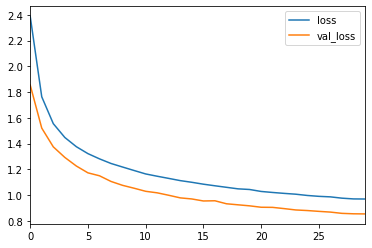

In [54]:
history_df[['loss', 'val_loss']].plot()

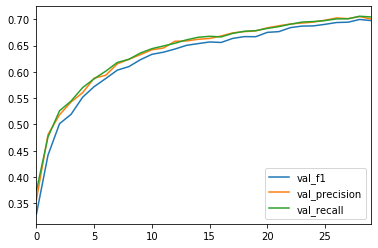

In [55]:
history_df[['val_f1', 'val_precision', 'val_recall']].plot()

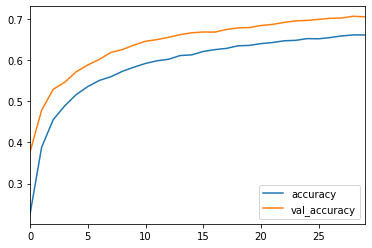

In [56]:
history_df[['accuracy', 'val_accuracy']].plot()

### 5. Prediction

In [57]:
loss,accuracy = model.evaluate(X_test,y_test,)
print('\ntest loss',loss)
print('accuracy',accuracy)

10500/10500 [==============================] - 2s 179us/step

test loss 0.8376214739481608
accuracy 0.7183809280395508
